In [ ]:
# Group - 29 ....MONSOON 2022....
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Setting up


**Importing Libraries**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore") 

**Reading Data**

In [ ]:
df = pd.read_csv("train.csv")

**Data Information**

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
df.describe(exclude=np.number)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [ ]:
df=df.drop(['ID','Name','SSN','Customer_ID'],axis=1)

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# Data cleaning

Check Duplicates Rows

In [ ]:
df.duplicated().sum()

0

Missing Data- NULL Values

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Month                           0
Credit_Mix                      0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Age                             0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
Credit_Score                    0
dtype: int64

In [ ]:
# Fix Age in data
df['Age'] = df['Age'].apply(lambda x: np.NaN if "_" in x else int(x))
df["Age"] = df["Age"].fillna(df["Age"].ffill())
df['Age'].isnull().sum()

0

In [ ]:
# Credit history age in months
#Dropped all credit History _Age..!!
df = df[df['Credit_History_Age'].notna()]
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: (int(x.split(' ')[0])*12+int(x.split(' ')[3]))).astype(float)
df['Credit_History_Age'].isnull().sum()

0

In [ ]:
# Fix Annual Income in data
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: float(str(x).replace("_","")) if "_" in x else float(x))

In [ ]:
# Delay_from_due_date should not be negative
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: abs(x))

In [ ]:
# Fill NA values in Monthly inhand salary
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].fillna(df['Annual_Income']/12)
df['Monthly_Inhand_Salary'].isnull().sum()

0

In [ ]:
# Fix Amount_invested_monthly in data
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: np.NaN if x=="__10000__" or x=="" else float(x))
mean_value=df['Amount_invested_monthly'].mean()
df['Amount_invested_monthly'].fillna(value=mean_value, inplace=True)
# Changed Null value to Mean..!!
df['Amount_invested_monthly'].isnull().sum()

0

In [ ]:
# Fix monthly balance in data
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: np.NaN if x=="__-333333333333333333333333333__" or x=="" else float(x))
mean_value1=df['Monthly_Balance'].mean()
df['Monthly_Balance'].fillna(value=mean_value1, inplace=True)
#Changed Null values to Mean ..!!

df['Monthly_Balance'].isnull().sum()

0

In [ ]:
df['Outstanding_Debt']=df['Outstanding_Debt'].apply(lambda x: float(str(x).replace("_","")) if "_" in x else float(x))

In [ ]:
df.Credit_Mix.value_counts()

Standard    33161
Good        22151
_           18371
Bad         17287
Name: Credit_Mix, dtype: int64

In [ ]:
# cleaning credit mix
df['Credit_Mix'] = df['Credit_Mix'].apply(lambda x: np.NaN if x=="_" or x=="" else x)
df['Credit_Mix']=df['Credit_Mix'].fillna(method='pad')

In [ ]:
df.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      23181
High_spent_Medium_value_payments    15965
Low_spent_Medium_value_payments     12620
High_spent_Large_value_payments     12505
High_spent_Small_value_payments     10308
Low_spent_Large_value_payments       9480
!@9#%8                               6911
Name: Payment_Behaviour, dtype: int64

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: "Unknown" if x=="!@9#%8" else x)

In [ ]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].apply(lambda x: "No" if x=="NM" or x=="" else x)

In [ ]:
# Fill missing values with 0 in Num_Credit_Inquiries
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].fillna(0)

In [ ]:
# cleaning num of delayed payment
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna("0")
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: str(str(x).replace("_","")))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: abs(float(x)))

In [ ]:
# filling not specified instead of na
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [ ]:
# cleaning Changed Credit limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: str(str(x).replace("_","0")))
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: (float(x)))

In [ ]:
#Num_of_Loan
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: str(str(x).replace("_","")))
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: abs(float(x)))

# EDA

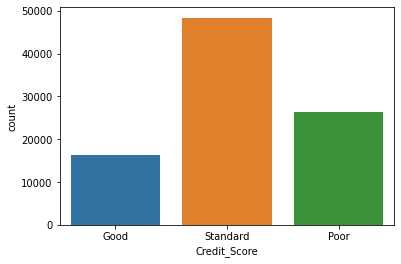

In [ ]:
sns.countplot(x='Credit_Score',data=df)
plt.show()

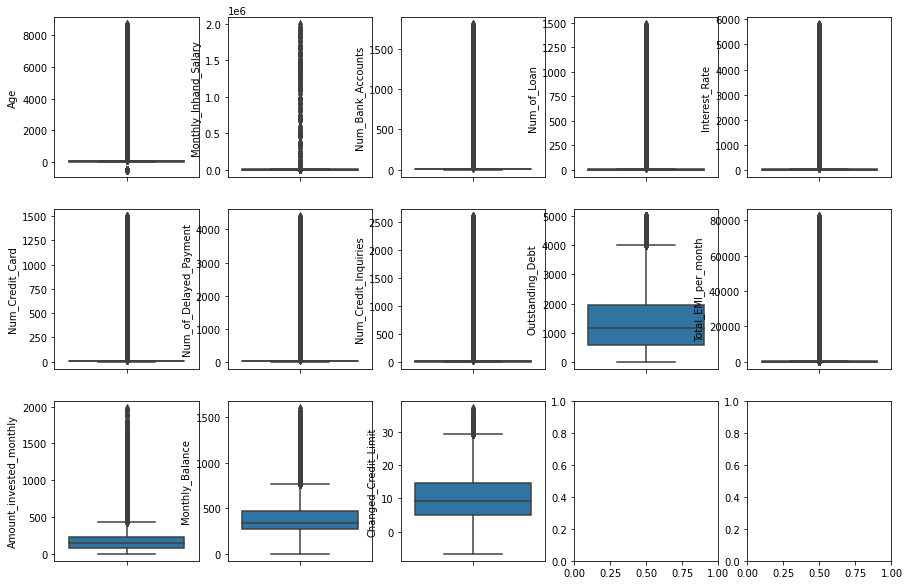

In [ ]:
#make boxplots of each numeric variable to see if there are any outliers and plot them in same row
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
sns.boxplot(y=df['Age'], ax=ax[0, 0])
sns.boxplot(y=df['Monthly_Inhand_Salary'], ax=ax[0, 1])
sns.boxplot(y=df['Num_Bank_Accounts'], ax=ax[0, 2])
sns.boxplot(y=df['Num_of_Loan'], ax=ax[0, 3])
sns.boxplot(y=df['Interest_Rate'], ax=ax[0, 4])
sns.boxplot(y=df['Num_Credit_Card'], ax=ax[1, 0])
sns.boxplot(y=df['Num_of_Delayed_Payment'], ax=ax[1, 1])
sns.boxplot(y=df['Num_Credit_Inquiries'], ax=ax[1, 2])
sns.boxplot(y=df['Outstanding_Debt'], ax=ax[1, 3])
sns.boxplot(y=df['Total_EMI_per_month'], ax=ax[1, 4])
sns.boxplot(y=df['Amount_invested_monthly'], ax=ax[2, 0])
sns.boxplot(y=df['Monthly_Balance'], ax=ax[2, 1])
sns.boxplot(y=df['Changed_Credit_Limit'], ax=ax[2, 2])

In [ ]:
# removing huge outliers and creating box plot again to see finer outliers
df = df[(df['Age'] <= 100)]
df = df[(df['Age'] >= 0)]
df = df[(df['Num_Bank_Accounts'] <= 200)]
df = df[(df['Num_of_Loan'] < 150)]
df = df[(df['Interest_Rate'] < 150)]
df = df[(df['Num_of_Delayed_Payment'] < 100)]
df = df[(df['Num_Credit_Inquiries'] <100)]
df = df[(df['Num_Credit_Card'] <100)]


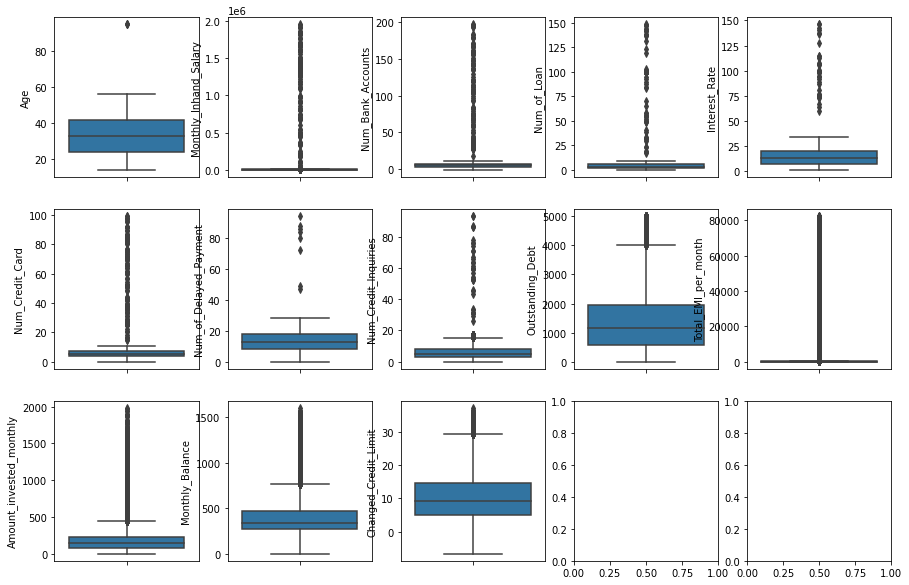

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
sns.boxplot(y=df['Age'], ax=ax[0, 0])
sns.boxplot(y=df['Monthly_Inhand_Salary'], ax=ax[0, 1])
sns.boxplot(y=df['Num_Bank_Accounts'], ax=ax[0, 2])
sns.boxplot(y=df['Num_of_Loan'], ax=ax[0, 3])
sns.boxplot(y=df['Interest_Rate'], ax=ax[0, 4])
sns.boxplot(y=df['Num_Credit_Card'], ax=ax[1, 0])
sns.boxplot(y=df['Num_of_Delayed_Payment'], ax=ax[1, 1])
sns.boxplot(y=df['Num_Credit_Inquiries'], ax=ax[1, 2])
sns.boxplot(y=df['Outstanding_Debt'], ax=ax[1, 3])
sns.boxplot(y=df['Total_EMI_per_month'], ax=ax[1, 4])
sns.boxplot(y=df['Amount_invested_monthly'], ax=ax[2, 0])
sns.boxplot(y=df['Monthly_Balance'], ax=ax[2, 1])
sns.boxplot(y=df['Changed_Credit_Limit'], ax=ax[2, 2])

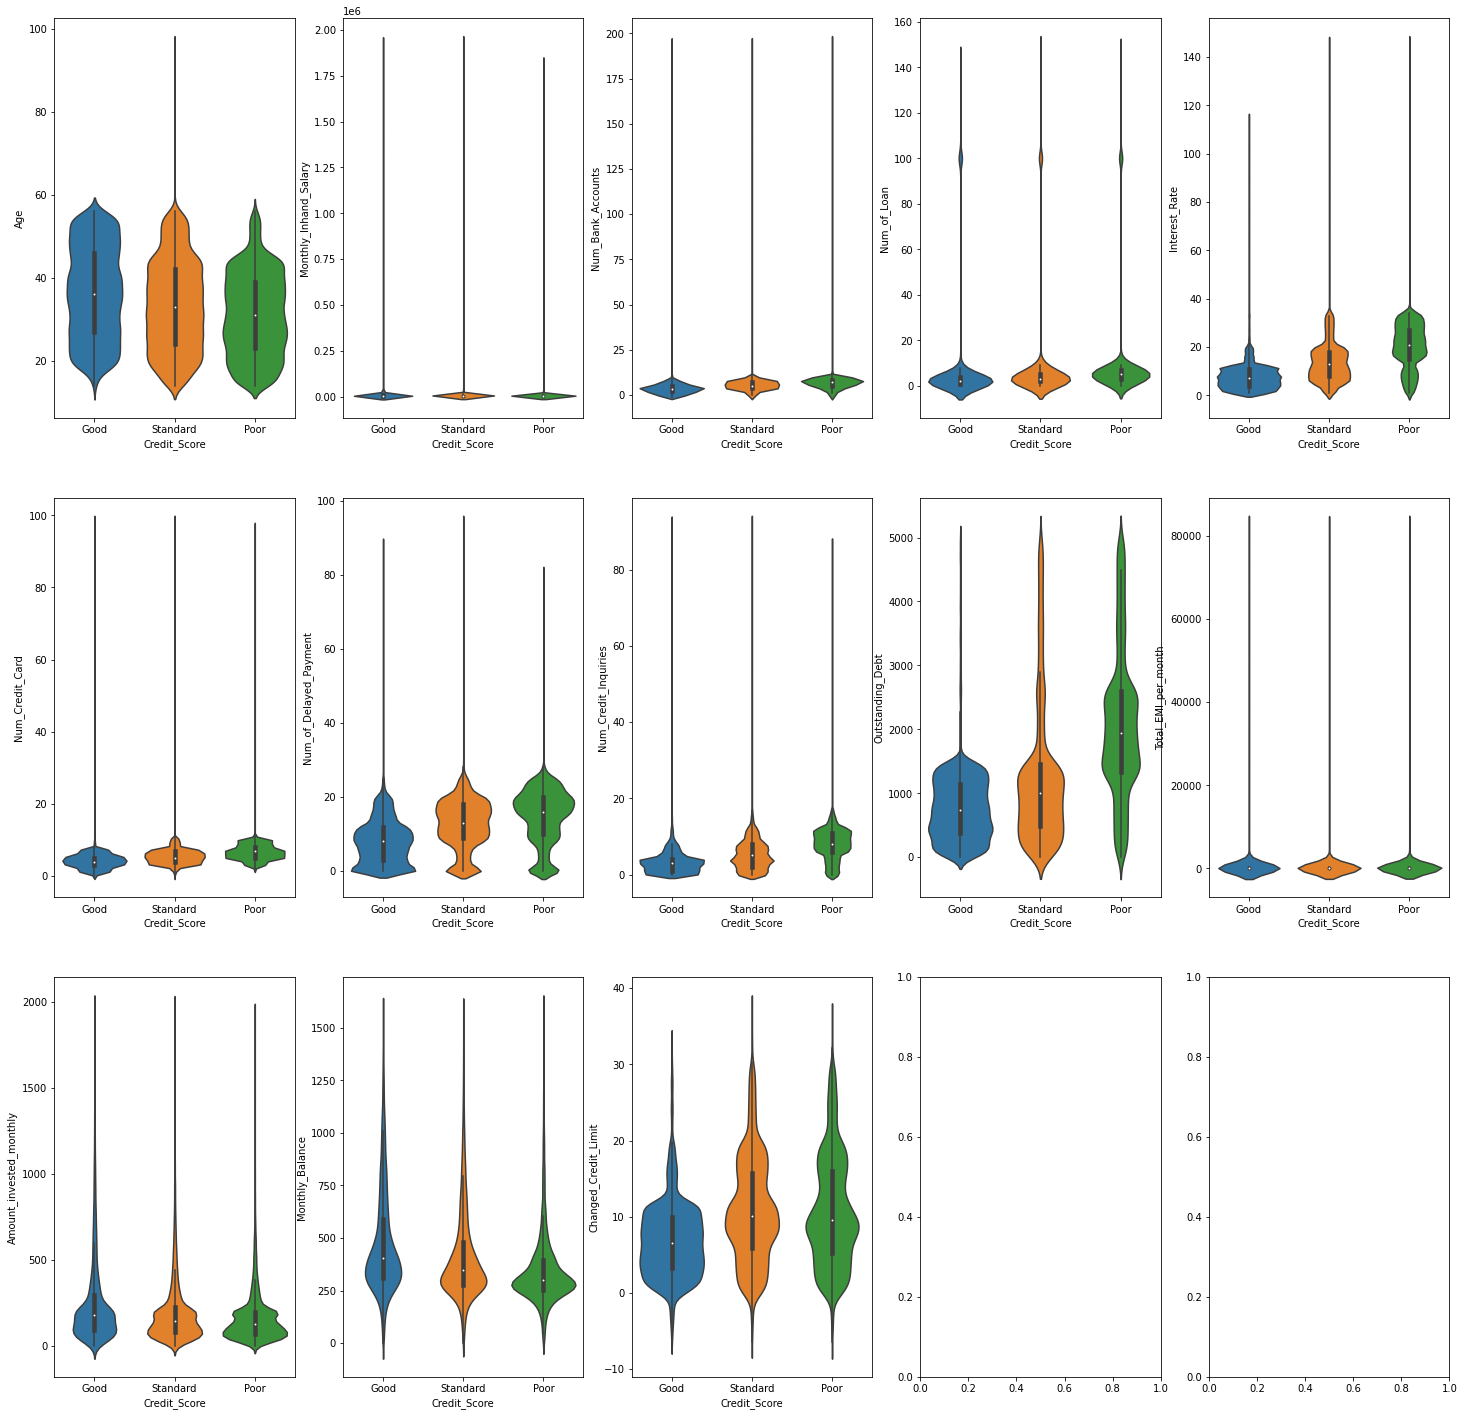

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(25, 25))
sns.violinplot(data=df, x="Credit_Score", y="Age", bw=0.15, ax=ax[0, 0])
sns.violinplot(data=df, x="Credit_Score", y="Monthly_Inhand_Salary", bw=0.15, ax=ax[0, 1])
sns.violinplot(data=df, x="Credit_Score", y="Num_Bank_Accounts", bw=0.15, ax=ax[0, 2])
sns.violinplot(data=df, x="Credit_Score", y="Num_of_Loan", bw=0.15, ax=ax[0, 3])
sns.violinplot(data=df, x="Credit_Score", y="Interest_Rate", bw=0.15, ax=ax[0, 4])
sns.violinplot(data=df, x="Credit_Score", y="Num_Credit_Card", bw=0.15, ax=ax[1, 0])
sns.violinplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", bw=0.15, ax=ax[1, 1])
sns.violinplot(data=df, x="Credit_Score", y="Num_Credit_Inquiries", bw=0.15, ax=ax[1, 2])
sns.violinplot(data=df, x="Credit_Score", y="Outstanding_Debt", bw=0.15, ax=ax[1, 3])
sns.violinplot(data=df, x="Credit_Score", y="Total_EMI_per_month", bw=0.15, ax=ax[1, 4])
sns.violinplot(data=df, x="Credit_Score", y="Amount_invested_monthly", bw=0.15, ax=ax[2, 0])
sns.violinplot(data=df, x="Credit_Score", y="Monthly_Balance", bw=0.15, ax=ax[2, 1])
sns.violinplot(data=df, x="Credit_Score", y="Changed_Credit_Limit", bw=0.15, ax=ax[2, 2])

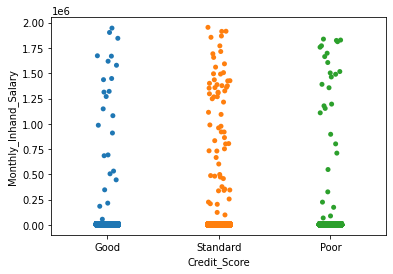

In [ ]:
sns.stripplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df);

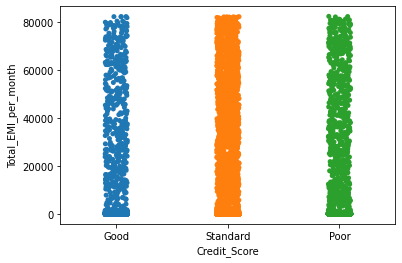

In [ ]:
sns.stripplot(x='Credit_Score', y='Total_EMI_per_month', data=df);

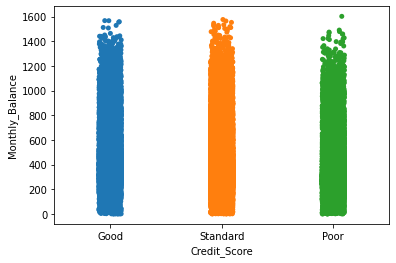

In [ ]:
sns.stripplot(x='Credit_Score', y='Monthly_Balance', data=df);

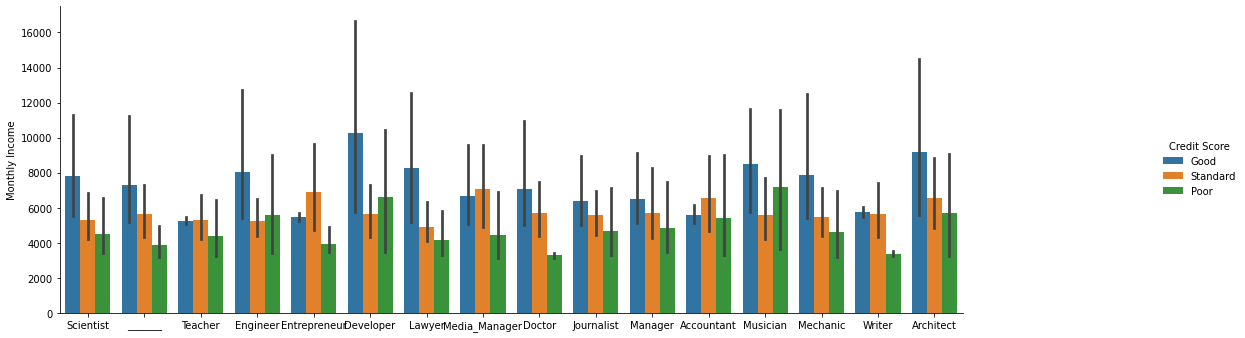

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="Occupation", y="Monthly_Inhand_Salary", hue="Credit_Score")

g.set_axis_labels("", "Monthly Income")
g.legend.set_title("Credit Score")
plt.gcf().set_size_inches(20, 5)
plt.show()

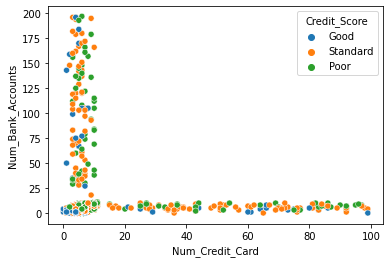

In [ ]:
sns.scatterplot(x='Num_Credit_Card', y='Num_Bank_Accounts', data=df, hue='Credit_Score')

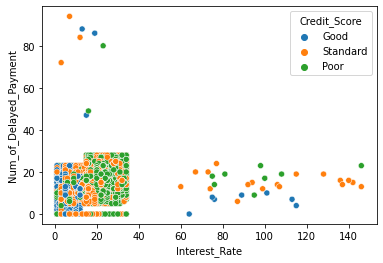

In [ ]:
sns.scatterplot(x='Interest_Rate', y='Num_of_Delayed_Payment', data=df, hue='Credit_Score')

# Pre-processing

In [ ]:
# Mapping month name to number [Encoding]
month_map=dict((v,k+1) for k,v in enumerate(df.Month.unique()))
df['Month'] = df['Month'].map(month_map)

In [ ]:
# Credit score labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

In [ ]:
# Credit_Mix label
df['Credit_Mix_label'] = le.fit_transform(df['Credit_Mix'])
df.Credit_Mix.value_counts()

Standard    37302
Good        24694
Bad         19448
Name: Credit_Mix, dtype: int64

In [ ]:
# Payment_Behaviour label
df['Payment_Behaviour_label'] = le.fit_transform(df['Payment_Behaviour'])

In [ ]:
# Payment_of_Min_Amount binary label
df['Payment_of_Min_Amount_label'] = le.fit_transform(df['Payment_of_Min_Amount'])

In [ ]:
# encoding type of loan
df['Type_of_Loan_label'] = le.fit_transform(df['Type_of_Loan'])

In [ ]:
df['Occupation_label'] = le.fit_transform(df['Occupation'])

In [ ]:
new_df = df
df.shape

(81445, 29)

In [ ]:
# Preprosseing ...!!
# Removing Outliers ..!!

df = df[(df['Age'] <= 75)] # Age outliers

df = df[(df['Interest_Rate'] <= 115)] # Interest outliers

df = df[(df['Num_of_Loan'] <= 99)] # number of loans outliers

df = df[(df['Num_of_Delayed_Payment'] <= 35)] # delayed payments outliers

df = df[(df['Num_Credit_Inquiries'] <= 80)] # Num_Credit_Inquires outliers

df = df[(df['Outstanding_Debt'] <= 4050)] # Outstanding_Debt outliers

df = df[(df['Changed_Credit_Limit'] <= 30)] # Outstanding_Debt outliers


df =  df[(df['Total_EMI_per_month'] <= 10000)] # Interest outliers


In [ ]:
df=df.drop(['Occupation','Type_of_Loan','Payment_Behaviour','Credit_Mix','Payment_of_Min_Amount'],axis=1) # dropping since Encoding done...!!


# Feature selection

In [ ]:
# sns.pairplot(df, hue='Credit_Score', height=2)

In [ ]:
# df.corr()

In [ ]:
df.Credit_Score.value_counts()

2    38369
1    20199
0    13308
Name: Credit_Score, dtype: int64

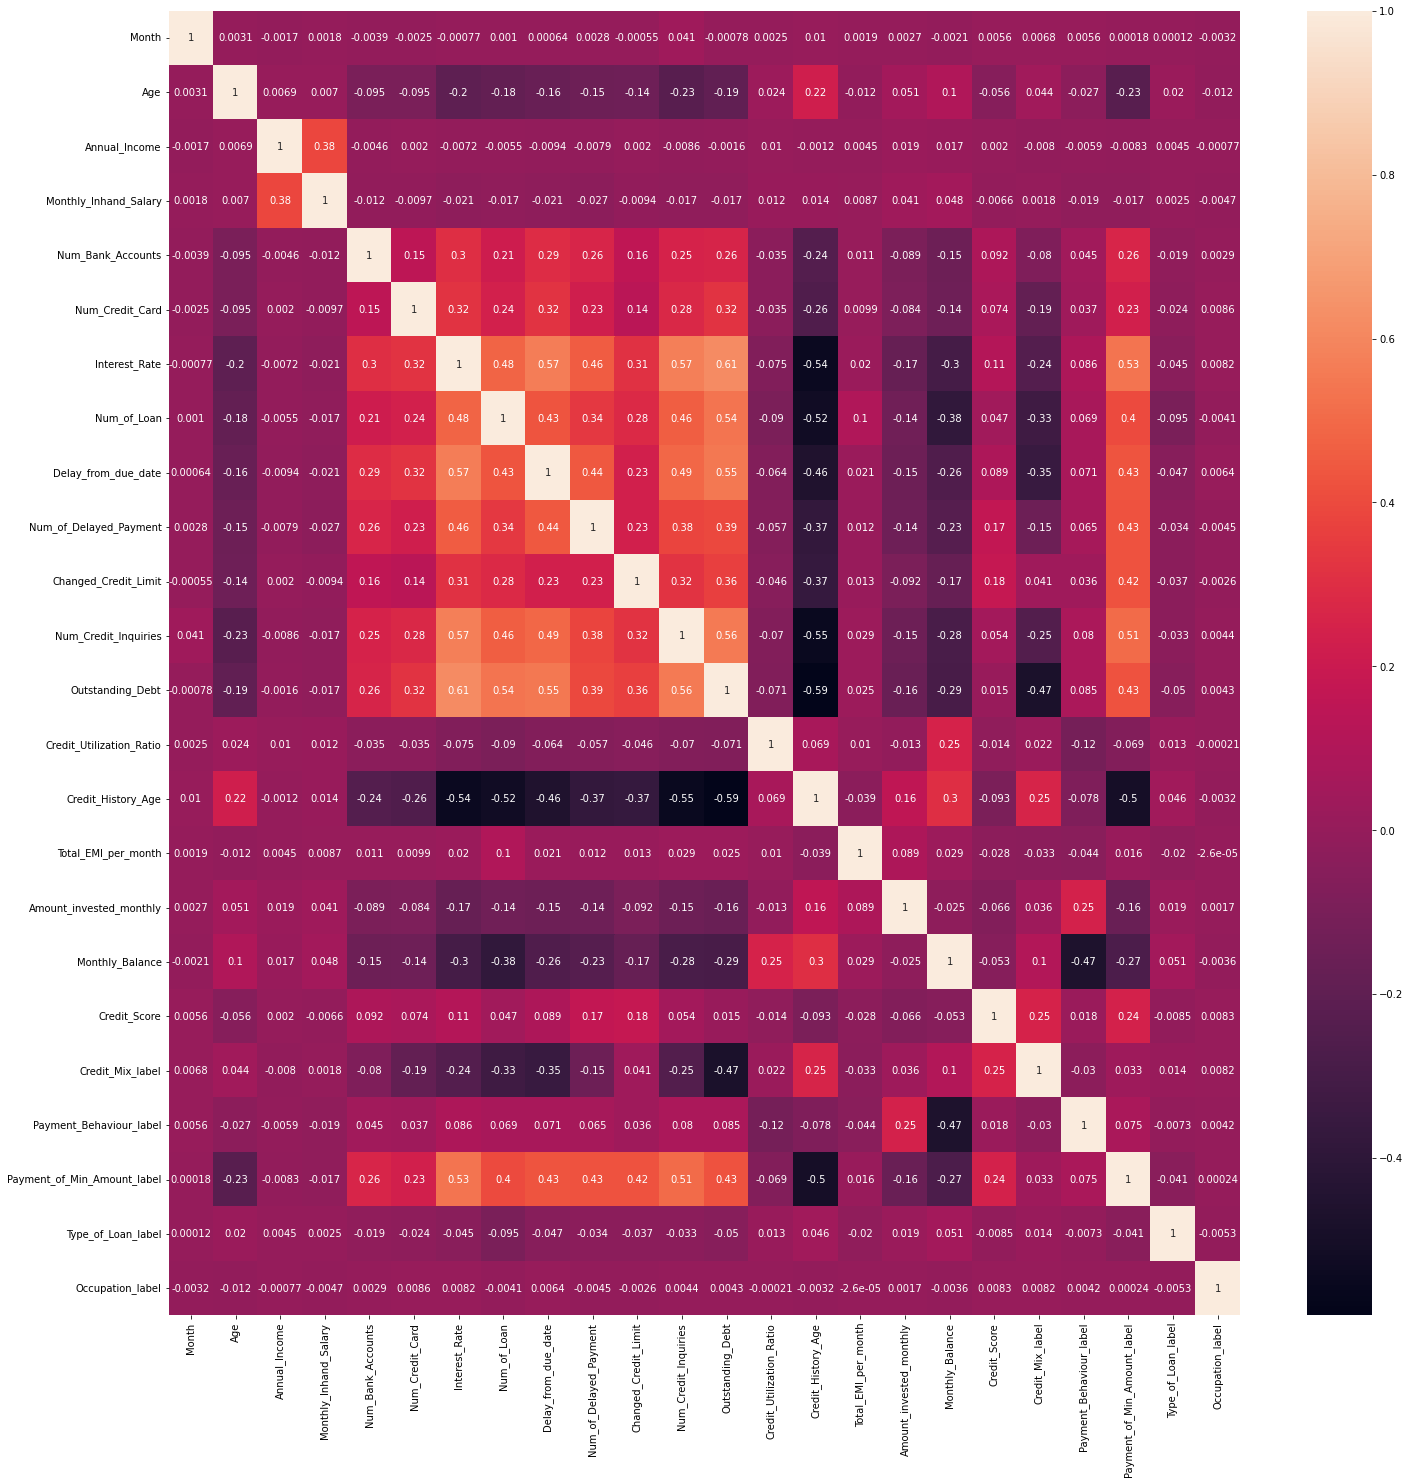

In [ ]:
plt.figure(figsize = (24,24))
sns.heatmap(df.corr() , annot = True )
plt.show()

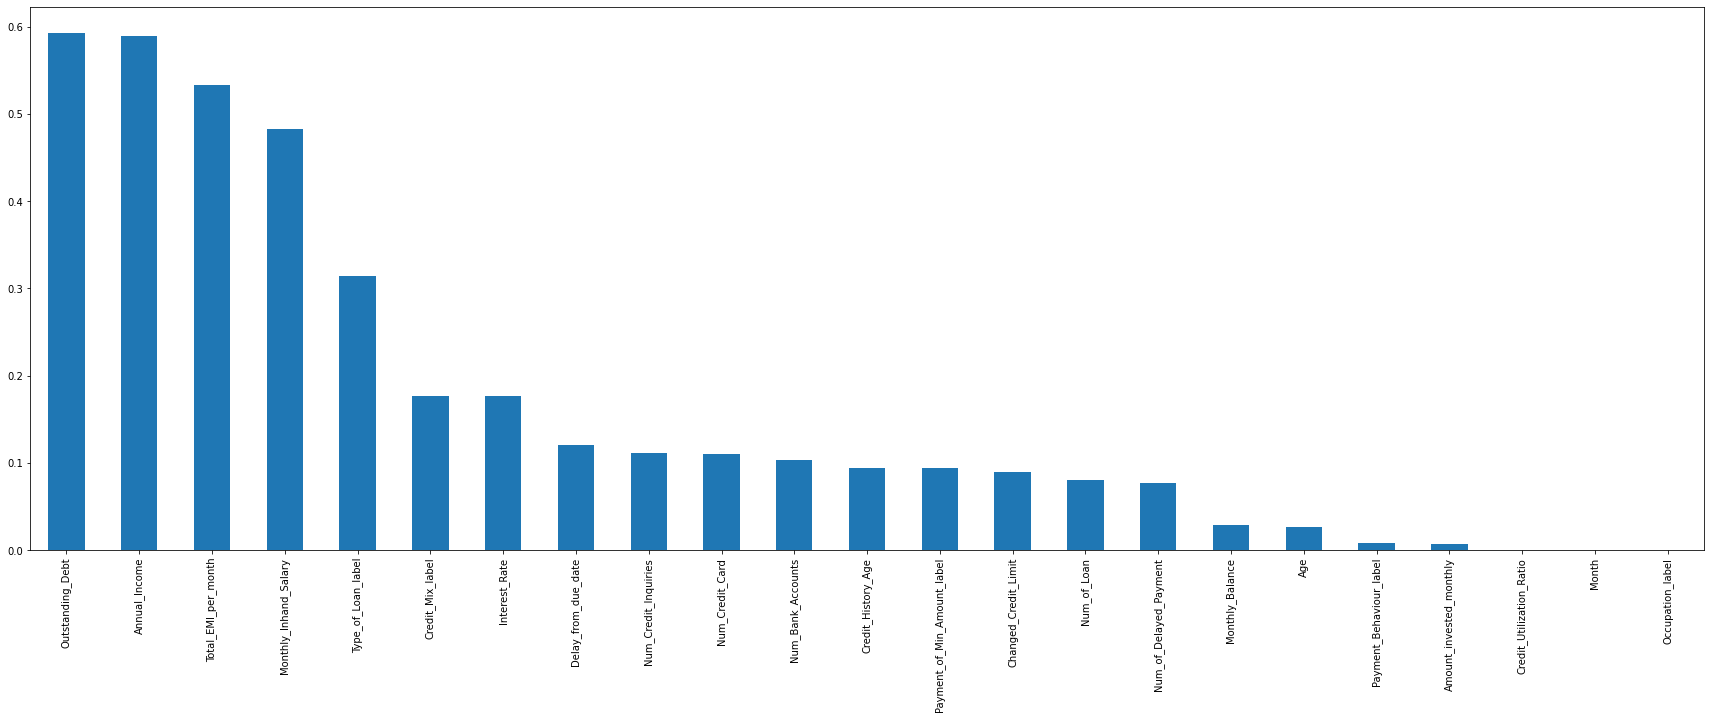

In [ ]:
#finding information gain for each feature in data
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df.drop('Credit_Score',axis=1),df['Credit_Score'])
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.drop('Credit_Score',axis=1).columns
mutual_info.sort_values(ascending=False)
#plotting information gain for each feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30, 10))

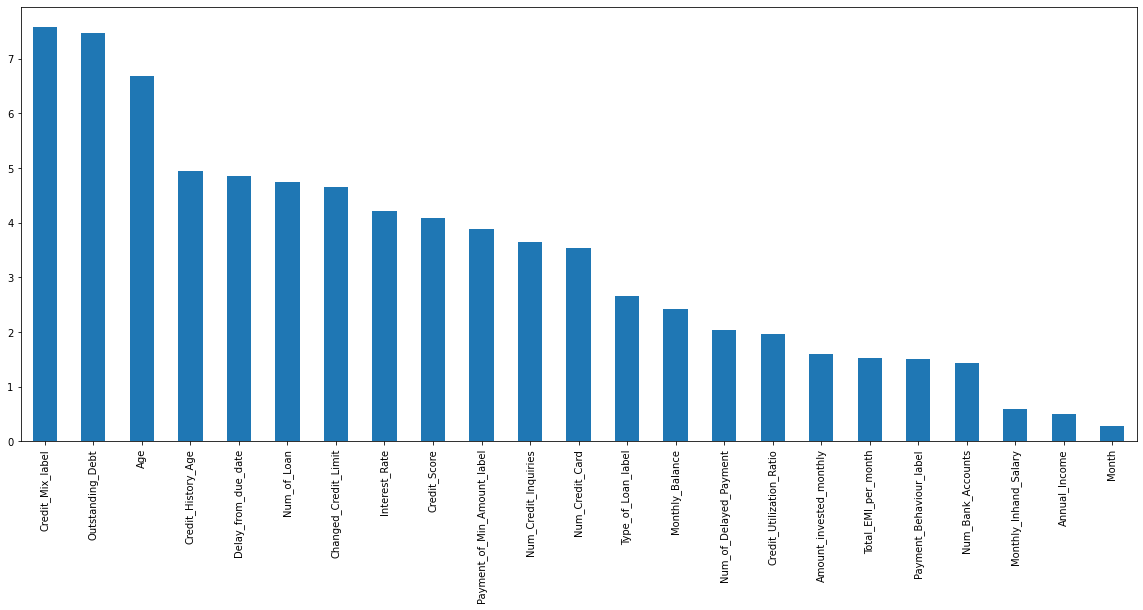

In [ ]:
#calculate fisher score for feature selection
from sklearn.feature_selection import f_classif
f_score = f_classif(df.iloc[:,:-1],df.iloc[:,-1])
f_score = pd.Series(f_score[0])
f_score.index = df.iloc[:,:-1].columns
f_score.sort_values(ascending=False)
#plot fisher score
f_score.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.show()

In [ ]:
df = df.drop(['Credit_Utilization_Ratio','Occupation_label','Month','Payment_Behaviour_label','Age'],axis=1)

In [ ]:
df.to_csv('train_cleaned.csv',index=False)


# Applying Models

In [31]:
df = pd.read_csv("train_cleaned.csv")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# logistic regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5765164162493044
              precision    recall  f1-score   support

           0       0.31      0.03      0.05      2651
           1       0.60      0.42      0.50      3968
           2       0.58      0.84      0.68      7757

    accuracy                           0.58     14376
   macro avg       0.49      0.43      0.41     14376
weighted avg       0.53      0.58      0.52     14376



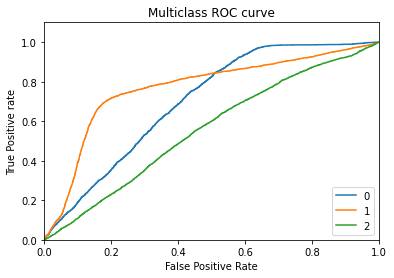

In [27]:
## Reference -> GFG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

fpr = {}

roc_cu  = LogisticRegression(max_iter=5000)

uniqueee =  np.unique(y_test)

roc_cu.fit(X_train,y_train)

binaryii=label_binarize(y_test,classes=uniqueee)

pred_prob =roc_cu.predict_proba(X_test)

y_pred =roc_cu.predict(X_test)
roc_auc = dict()


tpr = {}


for i in range(0,3): 
    fpr[i], tpr[i], thresh = roc_curve(binaryii[:,i], pred_prob[:,i])
    ap = 1 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    d=1
    
    plt.plot(fpr[i], tpr[i],label='%s'%(i))

plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.title('Multiclass ROC curve')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.ylim([0,1.1])

plt.show()

# 0 - good 
# 1 - poor 
# 2 - standard


In [ ]:
#applying naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5928631051752922
              precision    recall  f1-score   support

           0       0.37      0.23      0.28      2651
           1       0.63      0.59      0.61      3968
           2       0.62      0.72      0.67      7757

    accuracy                           0.59     14376
   macro avg       0.54      0.51      0.52     14376
weighted avg       0.58      0.59      0.58     14376



In [ ]:
#applying decision tree with information gain as criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7186978297161937
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2651
           1       0.73      0.69      0.71      3968
           2       0.76      0.76      0.76      7757

    accuracy                           0.72     14376
   macro avg       0.69      0.70      0.69     14376
weighted avg       0.72      0.72      0.72     14376



In [ ]:
#applying decision tree with gini index as criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dt = DecisionTreeClassifier(criterion='gini',max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.7271841958820257
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      2651
           1       0.74      0.70      0.72      3968
           2       0.78      0.75      0.77      7757

    accuracy                           0.73     14376
   macro avg       0.70      0.72      0.71     14376
weighted avg       0.74      0.73      0.73     14376



In [25]:
#applying random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
#accuracy score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8074568725653868
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      2651
           1       0.78      0.83      0.81      3968
           2       0.83      0.81      0.82      7757

    accuracy                           0.81     14376
   macro avg       0.80      0.80      0.80     14376
weighted avg       0.81      0.81      0.81     14376



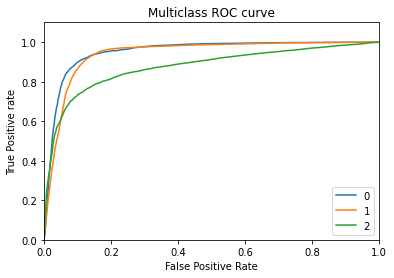

In [26]:
## Reference -> GFG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

fpr = {}


uniqueee =  np.unique(y_test)

binaryii=label_binarize(y_test,classes=uniqueee)

pred_prob =rf.predict_proba(X_test)

y_pred =rf.predict(X_test)
roc_auc = dict()


tpr = {}


for i in range(0,3): 
    fpr[i], tpr[i], thresh = roc_curve(binaryii[:,i], pred_prob[:,i])
    ap = 1 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    d=1
    
    plt.plot(fpr[i], tpr[i],label='%s'%(i))

plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.title('Multiclass ROC curve')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.ylim([0,1.1])

plt.show()

# 0 - good 
# 1 - poor 
# 2 - standard


Text(0.5, 1.0, 'Visualising Important Features')

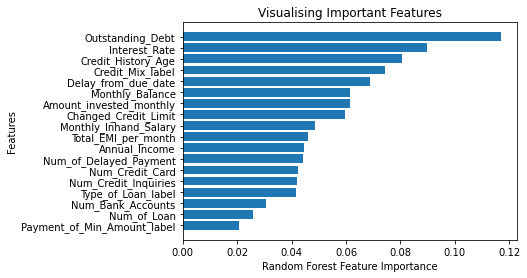

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(rf.feature_names_in_[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Visualising Important Features")

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
     'n_estimators' :[80,100,110,130],
     'max_depth':[10,15,20,None],
     'criterion':['gini','entropy']

}
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

In [ ]:
param_grid = { 
     'n_estimators' :[130,160,200,230],
     'max_depth':[None],
     'criterion':['gini','entropy']

}
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_cv = RandomForestClassifier(criterion= 'gini', max_depth= None, n_estimators= 200)
rf_cv.fit(X_train,y_train)
y_pred = rf_cv.predict(X_test)
#accuracy score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8123956594323873
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2651
           1       0.79      0.83      0.81      3968
           2       0.84      0.82      0.83      7757

    accuracy                           0.81     14376
   macro avg       0.80      0.81      0.80     14376
weighted avg       0.81      0.81      0.81     14376



0.6932387312186978


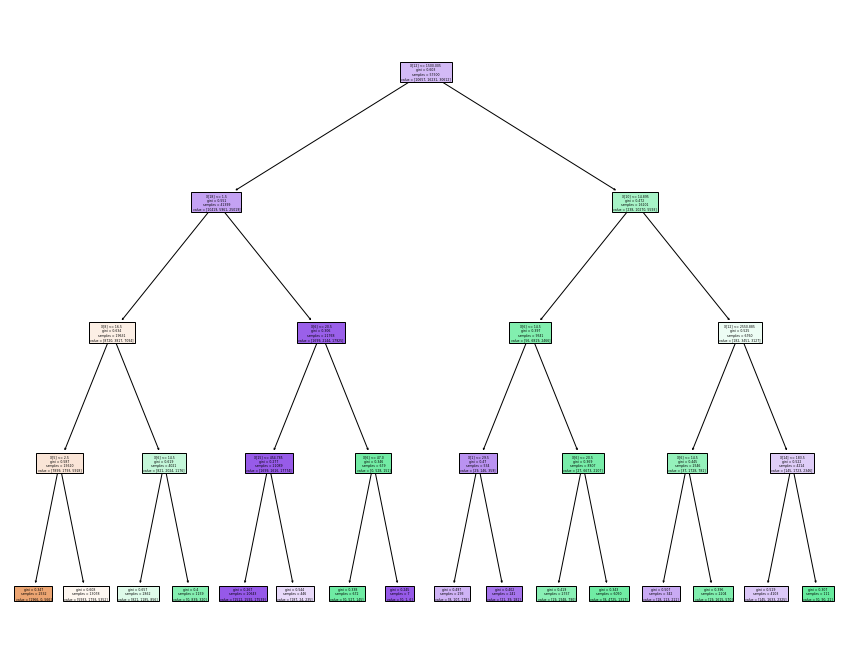

In [ ]:
from sklearn import tree

#to a simple plot,We used max depth of 4
dtt = DecisionTreeClassifier(max_depth=4)

dtt.fit(X_train, y_train)
dtt.fit(X_train,y_train)
y_pred = dtt.predict(X_test)
print(accuracy_score(y_test,y_pred))
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dtt , filled=True)
plt.show()

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
#accuracy score
acc_score = accuracy_score(y_test, y_pred)  # evaluating accuracy
print('accuracy score of KNN model:', acc_score * 100)
print(classification_report(y_test,y_pred))

accuracy score of KNN model: 74.909571508069
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2651
           1       0.74      0.78      0.76      3968
           2       0.79      0.77      0.78      7757

    accuracy                           0.75     14376
   macro avg       0.73      0.73      0.73     14376
weighted avg       0.75      0.75      0.75     14376



In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_knn=grid_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
accuracy = grid_search_knn.best_score_ *100
print("Accuracy for our training dataset with tuning is : "+str(accuracy)+"%")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 73.40327867410895%


In [17]:
#knn with tuned parameter
knc_cv = KNeighborsClassifier(n_neighbors=1)
knc_cv.fit(X_train,y_train)
y_pred = knc_cv.predict(X_test)
#accuracy score
acc_score = accuracy_score(y_test, y_pred)  # evaluating accuracy
print('Accuracy for our testing dataset with tuning is:', acc_score * 100)
print(classification_report(y_test,y_pred))

Accuracy for our testing dataset with tuning is: 76.17557039510295
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2651
           1       0.75      0.76      0.76      3968
           2       0.78      0.78      0.78      7757

    accuracy                           0.76     14376
   macro avg       0.75      0.75      0.75     14376
weighted avg       0.76      0.76      0.76     14376



In [14]:
from sklearn.ensemble import  StackingClassifier

In [ ]:
clf_stack = StackingClassifier([('knn_1nn',knc_cv),('rf',rf_cv)])

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test) 


acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)
print(classification_report(y_test,pred_stack))

accuracy score of Stacked model: 80.60656649972175
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2651
           1       0.79      0.81      0.80      3968
           2       0.82      0.83      0.82      7757

    accuracy                           0.81     14376
   macro avg       0.80      0.79      0.80     14376
weighted avg       0.81      0.81      0.81     14376



### XGB

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1)
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7127156371730662
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      2651
           1       0.74      0.66      0.70      3968
           2       0.76      0.75      0.75      7757

    accuracy                           0.71     14376
   macro avg       0.69      0.70      0.69     14376
weighted avg       0.72      0.71      0.71     14376



In [ ]:
grid_search_xgb = GridSearchCV(estimator = XGB, param_grid = {'n_estimators':(40, 50, 80,100,125,150,200,250,300,400,500)}, n_jobs = -1).fit(X_train,y_train)
print(grid_search_xgb.best_params_)
accuracy = grid_search_xgb.best_score_ *100
print("Accuracy for our training dataset with tuning is : "+str(accuracy)+"%")

{'n_estimators': 400}
Accuracy for our training dataset with tuning is : 71.92991340097494%


In [19]:
from xgboost import XGBClassifier
XGB_cv = XGBClassifier(n_estimators=500,n_jobs=-1)
XGB_cv.fit(X_train,y_train)
y_pred = XGB_cv.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print('Accuracy for our testing dataset with tuning is:', acc_score * 100)
print(classification_report(y_test,y_pred))

Accuracy for our testing dataset with tuning is: 73.14273789649415
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2651
           1       0.75      0.70      0.72      3968
           2       0.77      0.77      0.77      7757

    accuracy                           0.73     14376
   macro avg       0.71      0.72      0.71     14376
weighted avg       0.73      0.73      0.73     14376



In [20]:
clf_stack = StackingClassifier([('knn_1nn',knc_cv),('xgb',XGB_cv),('rf',rf_cv)])

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test) 


acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)
print(classification_report(y_test,pred_stack))

accuracy score of Stacked model: 80.66221480244853
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2651
           1       0.79      0.81      0.80      3968
           2       0.82      0.82      0.82      7757

    accuracy                           0.81     14376
   macro avg       0.80      0.79      0.80     14376
weighted avg       0.81      0.81      0.81     14376



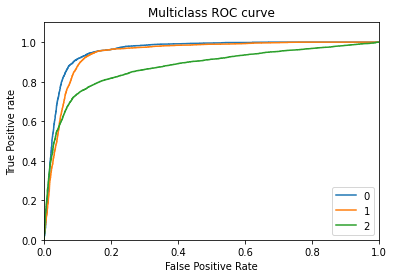

In [21]:
## Reference -> GFG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

fpr = {}


uniqueee =  np.unique(y_test)


binaryii=label_binarize(y_test,classes=uniqueee)

pred_prob =clf_stack.predict_proba(X_test)

y_pred =clf_stack.predict(X_test)
roc_auc = dict()


tpr = {}


for i in range(0,3): 
    fpr[i], tpr[i], thresh = roc_curve(binaryii[:,i], pred_prob[:,i])
    ap = 1 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    d=1
    
    plt.plot(fpr[i], tpr[i],label='%s'%(i))

plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.title('Multiclass ROC curve')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.ylim([0,1.1])

plt.show()

# 0 - good 
# 1 - poor 
# 2 - standard


# MLP bagging

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
#accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5700473010573177
              precision    recall  f1-score   support

           0       0.52      0.01      0.01      2651
           1       0.72      0.17      0.28      3968
           2       0.56      0.97      0.71      7757

    accuracy                           0.57     14376
   macro avg       0.60      0.38      0.33     14376
weighted avg       0.60      0.57      0.46     14376



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

li_clf = []

for i in range(0,100):
    p_train, t_train = shuffle(X_train,y_train)
    p_train_new, dump, t_train_new , dump2 = train_test_split(p_train,t_train,test_size=0.5)
    clf = MLPClassifier(random_state=1, max_iter=300).fit(p_train_new, t_train_new)
    li_clf.append(clf)

In [ ]:
li_out = []
y_pred = []

for i in range(0,len(X_test)):
        li_out.append([])
for model in li_clf:
    pred = model.predict(X_test)
    for i in range(0,len(pred)):
        li_out[i].append(pred[i])

for i in li_out:
    y_pred.append(max(set(i), key=i.count))

#check accuracy
print("Accuracy of neural network classifier: ", accuracy_score(y_test, y_pred))
#check f1 score
print("F1 score of neural network classifier: ", f1_score(y_test, y_pred, average='weighted'))
#check precision score
print("Precision score of neural network classifier: ", precision_score(y_test, y_pred, average='weighted'))
#check recall score
print("Recall score of neural network classifier: ", recall_score(y_test, y_pred, average='weighted'))

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC.fit(X_train, y_train)
y_pred = ETC.predict(X_test)
#accuracy score
acc_score = accuracy_score(y_test, y_pred)  # evaluating accuracy
print('accuracy score of ExtraTreesClassifier model:', acc_score * 100)
print(classification_report(y_test,y_pred))

accuracy score of ExtraTreesClassifier model: 80.39092932665554
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2651
           1       0.78      0.81      0.80      3968
           2       0.82      0.82      0.82      7757

    accuracy                           0.80     14376
   macro avg       0.79      0.79      0.79     14376
weighted avg       0.80      0.80      0.80     14376



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
clf_stack = StackingClassifier([('etc',ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)),('rf',RandomForestClassifier(criterion= 'gini', max_depth= None, n_estimators= 200))])

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test) 


acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

accuracy score of Stacked model: 80.78046744574291


In [ ]:
# SVM 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)
print(classification_report(y_train, svc.predict(X_train)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, svc.predict(X_test))))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64     10657
           1       0.75      0.66      0.70     16231
           2       0.77      0.75      0.76     30612

    accuracy                           0.72     57500
   macro avg       0.70      0.71      0.70     57500
weighted avg       0.73      0.72      0.72     57500

Model accuracy score with default hyperparameters: 0.7115
